# Titanic Survival Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
# Load the data using pandas function
try:
    df = pd.read_csv('/content/sample_data/Titanic Survival/titanic.csv')
    print('Loaded data sucessfully')
except:
    print('Error in data loading')

Loaded data sucessfully


In [3]:
df.sample(frac=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
723,724,0,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.0000,NaN,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,NaN,S
608,609,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0,1,2,SC/Paris 2123,41.5792,NaN,C
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
239,240,0,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.2750,NaN,S
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S
543,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,NaN,S
666,667,0,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S


In [4]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- So we have total 891 entries and 12 columns.
- data contains both numerical and categorical columns.
- and also data have null values.

<Axes: >

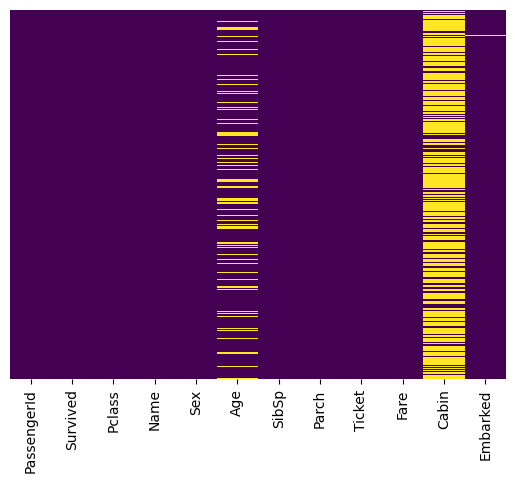

In [5]:
# another method to check the null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
numerical_data = df.select_dtypes(include='number')
categorical_data = df.select_dtypes(exclude='number')

In [7]:
# Univarite Analysis
from collections import OrderedDict
stats = []

for i in numerical_data:
    numerical_stats = OrderedDict({
        'Feature':i,
        'Mean':numerical_data[i].mean(),
        'Median(50%)':numerical_data[i].median(),
        'Min':numerical_data[i].min(),
        'Max':numerical_data[i].max(),
        '75%':numerical_data[i].quantile(0.75),
        '25%':numerical_data[i].quantile(0.25),
        'Standard Deviation':numerical_data[i].std(),
        'Skewness':numerical_data[i].skew(),
        'Kurtosis':numerical_data[i].kurt(),
        'Missing':df[i].isnull().sum(),
        'Missing %':df[i].isnull().mean()*100
    })
    stats.append(numerical_stats)
report = pd.DataFrame(stats)
report.T

,0,1,2,3,4,5,6
Feature,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Mean,446.0,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
Median(50%),446.0,0.0,3.0,28.0,0.0,0.0,14.4542
Min,1.0,0.0,1.0,0.42,0.0,0.0,0.0
Max,891.0,1.0,3.0,80.0,8.0,6.0,512.3292
75%,668.5,1.0,3.0,38.0,1.0,0.0,31.0
25%,223.5,0.0,2.0,20.125,0.0,0.0,7.9104
Standard Deviation,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
Skewness,0.0,0.478523,-0.630548,0.389108,3.695352,2.749117,4.787317
Kurtosis,-1.2,-1.775005,-1.280015,0.178274,17.88042,9.778125,33.398141


In [8]:
# Univariate analysis for categorical data
stats = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_stat = OrderedDict({
            'Feature':col,
            'Mode': df[col].mode()[0],
            'Unique': df[col].nunique(),
            'Missing': df[col].isnull().sum(),
            'Missing %': df[col].isnull().mean()*100
        })
        stats.append(categorical_stat)

report = pd.DataFrame(stats)
report

,Feature,Mode,Unique,Missing,Missing %
0,Name,"Abbing, Mr. Anthony",891,0,0.000000
1,Sex,male,2,0,0.000000
2,Ticket,1601,681,0,0.000000
3,Cabin,B96 B98,147,687,77.104377
4,Embarked,S,3,2,0.224467


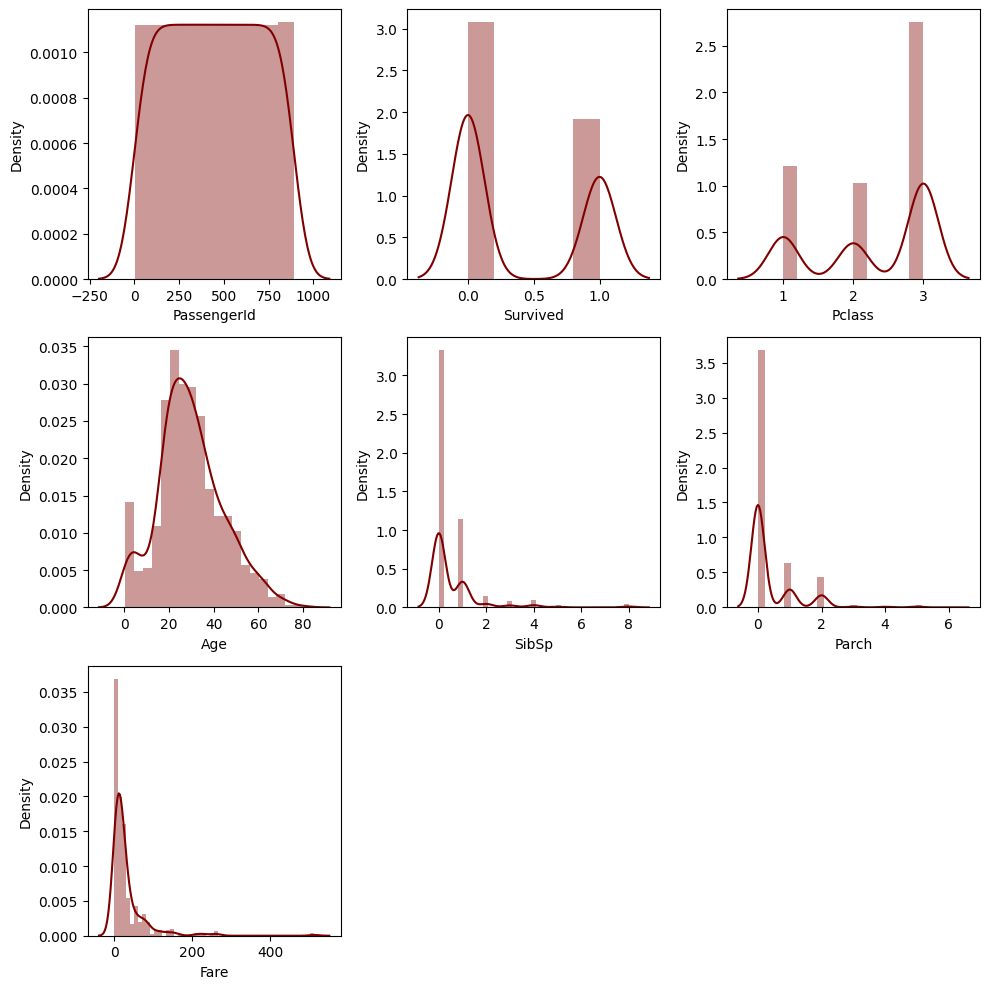

In [9]:
# Data distribution
plt.figure(figsize=(10,10))
plot = 0
for i in numerical_data:
    plot = plot + 1
    plt.subplot(3,3,plot)
    sns.distplot(df[i],color='maroon')
plt.tight_layout()
plt.show()

In [10]:
numerical_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


- Checked the correlation to see how affects our numerical columns with the target column

In [11]:
numerical_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

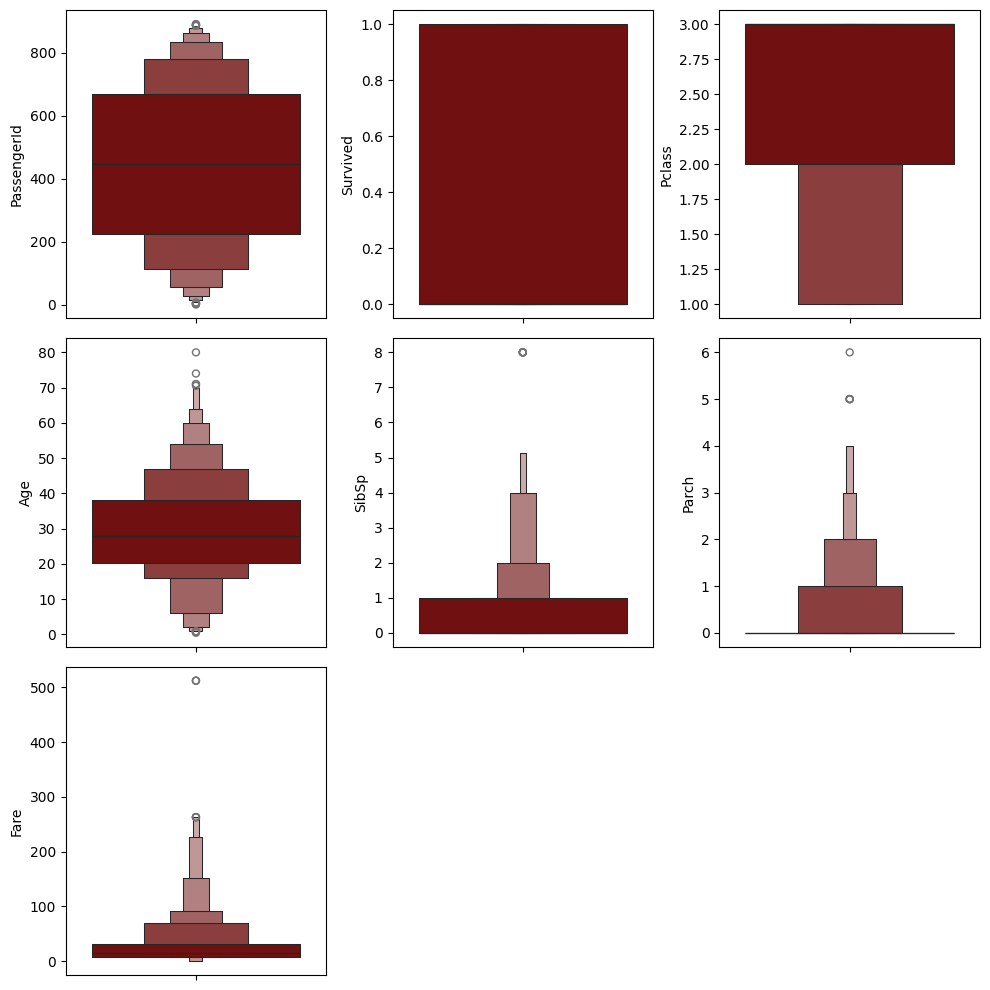

In [12]:
plt.figure(figsize =(10,10))
plot = 0
for i in numerical_data:
    plot = plot + 1
    plt.subplot(3,3,plot)
    sns.boxenplot(df[i],color ='maroon')
plt.tight_layout()
plt.show()

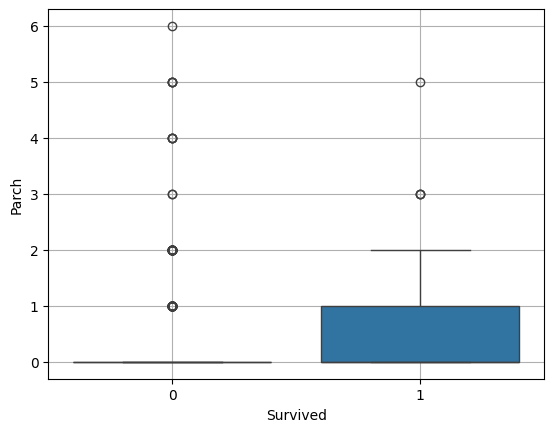

In [13]:
plt.plot(figsize=(7,5))
sns.boxplot(data=df,x='Survived',y='Parch')
plt.grid()
plt.show()

In [14]:
i = df[(df['Parch']>=5)].index
df.drop(i,axis=0,inplace=True)

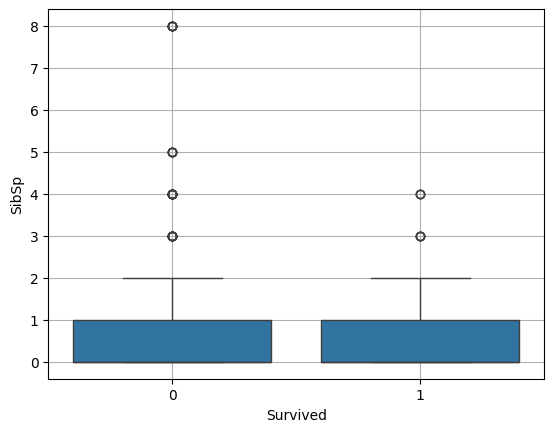

In [15]:
plt.plot(figsize=(7,5))
sns.boxplot(data=df,x='Survived',y='SibSp')
plt.grid()
plt.show()

In [16]:
i = df[(df['SibSp']>=8)].index
df.drop(i,axis=0,inplace=True)

- To improve the performance of algorithms we removed the outliers

In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
df['Pclass'].value_counts()

,count
Pclass,
3,478
1,216
2,184


- Here we can see the total count of the passengers and most of the passengers are from third class.

In [19]:
crosstab_1 = pd.crosstab(index=df['Survived'],columns=[df['Pclass'],df['Sex']])
crosstab_1

Pclass        1           2           3     
Sex      female male female male female male
Survived                                    
0             3   77      6   91     65  295
1            91   45     70   17     71   47

- From above analysis we can get know that most of the male passengers are died in third class as compare to other passenger class.

In [20]:
print("C - Cherbourg\nQ - Queenstown\nS - Southampton")
crosstab_2 = pd.crosstab(index=df['Survived'],columns=[df['Embarked'],df['Sex']])
crosstab_2

C - Cherbourg
Q - Queenstown
S - Southampton


Embarked      C           Q           S     
Sex      female male female male female male
Survived                                    
0             9   66      8   38     57  359
1            64   29     27    3    139   77

- From above analysis we can see that most of the passengers are borded from S(Southampton).
- and maximum male passenger were died from Southampton.
- also maximum female passegers are survived from the Southampton.

In [21]:
crosstab_3 = pd.crosstab(index=df['Survived'],columns=[df['Embarked'],df['Pclass']])
crosstab_3

Embarked   C         Q          S         
Pclass     1  2   3  1  2   3   1   2    3
Survived                                  
0         26  8  41  1  1  44  53  88  275
1         59  9  25  1  2  27  74  76   66

<Axes: xlabel='Sex,Pclass,Survived'>

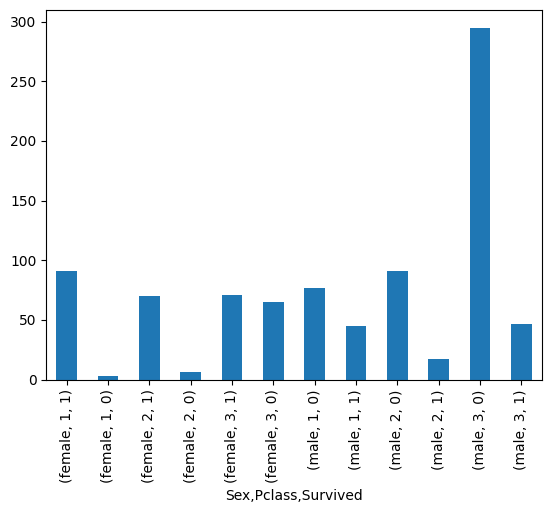

In [22]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
survived_data = df.groupby(['Sex','Pclass']).Survived.value_counts()
survived_data.plot(kind='bar')

- Here we can see the visual representation of the passengers survival with their class and passenger type.

In [23]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
survived_data = df.groupby(['Sex','Pclass']).value_counts()
survived_data

Sex     Pclass  PassengerId  Survived  Name                                                                                Age    SibSp  Parch  Ticket             Fare      Cabin            Embarked
female  1       2            1         Cumings, Mrs. John Bradley (Florence Briggs Thayer)                                 38.00  1      0      PC 17599           71.2833   C85              C           1
                4            1         Futrelle, Mrs. Jacques Heath (Lily May Peel)                                        35.00  1      0      113803             53.1000   C123             S           1
                12           1         Bonnell, Miss. Elizabeth                                                            58.00  0      0      113783             26.5500   C103             S           1
                53           1         Harper, Mrs. Henry Sleeper (Myna Haxtun)                                            49.00  1      0      PC 17572           76.7292   D33              C           1
                89           1         Fortune, Miss. Mabel Helen                                                          23.00  3      2      19950              263.0000  C23 C25 C27      S           1
                137          1         Newsom, Miss. Helen Monypeny                                                        19.00  0      2      11752              26.2833   D47              S           1
                152          1         Pears, Mrs. Thomas (Edith Wearne)                                                   22.00  1      0      113776             66.6000   C2               S           1
                178          0         Isham, Miss. Ann Elizabeth                                                          50.00  0      0      PC 17595           28.7125   C49              C           1
                195          1         Brown, Mrs. James Joseph (Margaret Tobin)                                           44.00  0      0      PC 17610           27.7208   B4               C           1
                196          1         Lurette, Miss. Elise                                                                58.00  0      0      PC 17569           146.5208  B80              C           1
                216          1         Newell, Miss. Madeleine                                                             31.00  1      0      35273              113.2750  D36              C           1
                219          1         Bazzani, Miss. Albina                                                               32.00  0      0      11813              76.2917   D15              C           1
                231          1         Harris, Mrs. Henry Birkhardt (Irene Wallach)                                        35.00  1      0      36973              83.4750   C83              S           1
                258          1         Cherry, Miss. Gladys                                                                30.00  0      0      110152             86.5000   B77              S           1
                269          1         Graham, Mrs. William Thompson (Edith Junkins)                                       58.00  0      1      PC 17582           153.4625  C125             S           1
                270          1         Bissette, Miss. Amelia                                                              35.00  0      0      PC 17760           135.6333  C99              S           1
                276          1         Andrews, Miss. Kornelia Theodosia                                                   63.00  1      0      13502              77.9583   D7               S           1
                292          1         Bishop, Mrs. Dickinson H (Helen Walton)                                             19.00  1      0      11967              91.0792   B49              C           1
                298          0         Allison, Miss. Helen Loraine                                                        2.00  

- Here we can see the detailed information of their class and passenger type.

<Axes: xlabel='Sex,Embarked,Survived'>

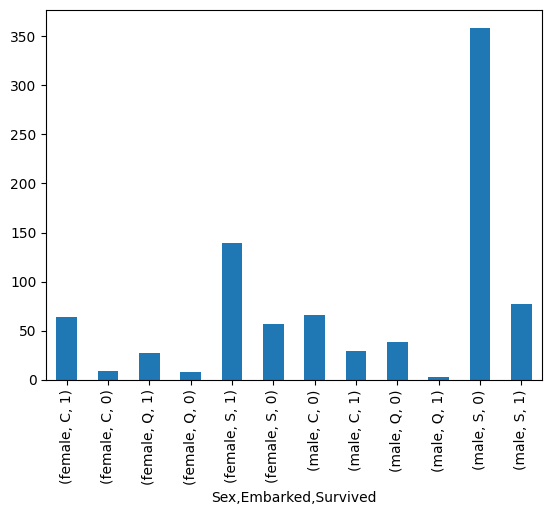

In [24]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
survived_data = df.groupby(['Sex','Embarked']).Survived.value_counts()
survived_data.plot(kind='bar')

- Here we can see the visual representation of the passengers survival with their boarding location and passenger type.

In [25]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
survived_data = df.groupby(['Sex','Embarked']).value_counts()
survived_data

Sex     Embarked  PassengerId  Survived  Pclass  Name                                                                                Age    SibSp  Parch  Ticket             Fare      Cabin          
female  C         2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)                                 38.00  1      0      PC 17599           71.2833   C85                1
                  53           1         1       Harper, Mrs. Henry Sleeper (Myna Haxtun)                                            49.00  1      0      PC 17572           76.7292   D33                1
                  178          0         1       Isham, Miss. Ann Elizabeth                                                          50.00  0      0      PC 17595           28.7125   C49                1
                  195          1         1       Brown, Mrs. James Joseph (Margaret Tobin)                                           44.00  0      0      PC 17610           27.7208   B4                 1
                  196          1         1       Lurette, Miss. Elise                                                                58.00  0      0      PC 17569           146.5208  B80                1
                  216          1         1       Newell, Miss. Madeleine                                                             31.00  1      0      35273              113.2750  D36                1
                  219          1         1       Bazzani, Miss. Albina                                                               32.00  0      0      11813              76.2917   D15                1
                  292          1         1       Bishop, Mrs. Dickinson H (Helen Walton)                                             19.00  1      0      11967              91.0792   B49                1
                  300          1         1       Baxter, Mrs. James (Helene DeLaudeniere Chaput)                                     50.00  0      1      PC 17558           247.5208  B58 B60            1
                  308          1         1       Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)  17.00  1      0      PC 17758           108.9000  C65                1
                  310          1         1       Francatelli, Miss. Laura Mabel                                                      30.00  0      0      PC 17485           56.9292   E36                1
                  311          1         1       Hays, Miss. Margaret Bechstein                                                      24.00  0      0      11767              83.1583   C54                1
                  312          1         1       Ryerson, Miss. Emily Borie                                                          18.00  2      2      PC 17608           262.3750  B57 B59 B63 B66    1
                  320          1         1       Spedden, Mrs. Frederic Oakley (Margaretta Corning Stone)                            40.00  1      1      16966              134.5000  E34                1
                  326          1         1       Young, Miss. Marie Grice                                                            36.00  0      0      PC 17760           135.6333  C32                1
                  330          1         1       Hippach, Miss. Jean Gertrude                                                        16.00  0      1      111361             57.9792   B18                1
                  338          1         1       Burns, Miss. Elizabeth Margaret                                                     41.00  0      0      16966              134.5000  E40                1
                  367          1         1       Warren, Mrs. Frank Manley (Anna Sophia Atkinson)                                    60.00  1      0      110813             75.2500   D37                1
                  370          1         1       Aubart, Mme. Leontine Pauline                                                   

- Here we can see the detailed information of their bording location and passenger type.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 878 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  878 non-null    int64  
 1   Survived     878 non-null    int64  
 2   Pclass       878 non-null    int64  
 3   Name         878 non-null    object 
 4   Sex          878 non-null    object 
 5   Age          708 non-null    float64
 6   SibSp        878 non-null    int64  
 7   Parch        878 non-null    int64  
 8   Ticket       878 non-null    object 
 9   Fare         878 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     876 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 89.2+ KB


In [27]:
# Fill the missing values using KNN imputer
from sklearn.impute import SimpleImputer, KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['Age'] = imputer.fit_transform(df[['Age']])

In [28]:
df['Cabin'].value_counts()

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
F2,3
C22 C26,3
D,3
E101,3
F33,3
C68,2


In [29]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [30]:
# Droped the unwanted columns
df.drop(columns=['PassengerId','Name','Ticket','Fare','Cabin'],inplace=True)

In [31]:
df['Embarked'].value_counts()

,count
Embarked,
S,632
C,168
Q,76


In [32]:
df['Embarked']= df['Embarked'].fillna('S')
df['Embarked']= df['Embarked'].replace({'S':0,'C':1,'Q':2})
df['Sex']= df['Sex'].replace({'male':0,'female':1})

In [33]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [34]:
# Split the data into Feature and target
X = df.drop(columns=['Survived'])
y = df['Survived']

In [35]:
# Split the data for training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(614, 6) (264, 6) (614,) (264,)


In [36]:

from sklearn.preprocessing import PowerTransformer
scalar = PowerTransformer()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [37]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train,y_train = smote.fit_resample(X_train,y_train)

In [38]:
# Import Machile Learning Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [39]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'KNeighbors Classifier' : KNeighborsClassifier(),
    'RandomForest Classifier': RandomForestClassifier(),
    'SVC' : SVC()
}

for i in models:
    model = models[i]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('Model:',i)
    print('Accuracy:',accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print('\n')

Model: Logistic Regression
Accuracy: 0.7840909090909091
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       165
           1       0.69      0.78      0.73        99

    accuracy                           0.78       264
   macro avg       0.77      0.78      0.78       264
weighted avg       0.79      0.78      0.79       264



Model: Decision Tree
Accuracy: 0.803030303030303
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       165
           1       0.71      0.80      0.75        99

    accuracy                           0.80       264
   macro avg       0.79      0.80      0.79       264
weighted avg       0.81      0.80      0.80       264



Model: KNeighbors Classifier
Accuracy: 0.7992424242424242
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       165
           1       0.71      0.79      0.75        99

    accuracy   

# Deep Learning

### ANN Technique

In [40]:
# Importing Deep Learning Library
import tensorflow
from keras.models import Sequential
from keras.layers import Dense

In [41]:
X.shape

(878, 6)

In [42]:
ann_model = Sequential()
ann_model.add(Dense(128,activation='relu',input_dim=6))
ann_model.add(Dense(64,activation='relu'))
ann_model.add(Dense(32,activation='relu'))
ann_model.add(Dense(16,activation='relu'))
ann_model.add(Dense(1,activation='sigmoid'))

In [43]:
ann_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
from keras import backend as K
K.clear_session()

In [45]:
ann_model.fit(X_train,y_train,epochs=500,batch_size=32,validation_split=0.3)

Epoch 1/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.5652 - loss: 0.6774 - val_accuracy: 0.7143 - val_loss: 0.6330
Epoch 2/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8170 - loss: 0.5448 - val_accuracy: 0.7232 - val_loss: 0.5828
Epoch 3/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8123 - loss: 0.4377 - val_accuracy: 0.7812 - val_loss: 0.5314
Epoch 4/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7893 - loss: 0.4306 - val_accuracy: 0.7634 - val_loss: 0.5383
Epoch 5/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8160 - loss: 0.4244 - val_accuracy: 0.7589 - val_loss: 0.5496
Epoch 6/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8295 - loss: 0.3941 - val_accuracy: 0.7768 - val_loss: 0.5171
Epoch 7/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8170 - loss: 0.4083 - val_accuracy: 0.7589 - val_loss: 0.5096
Epoch 8/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8228 - loss: 0.4125 - val_accuracy: 0.7455 -

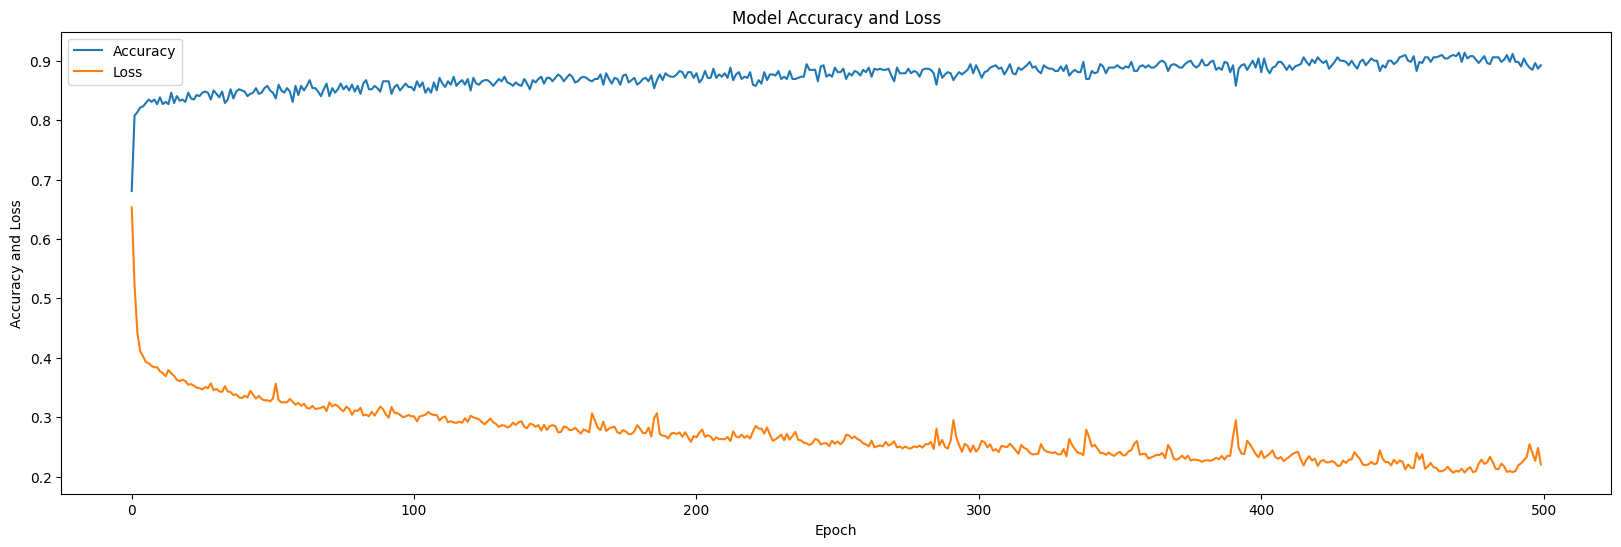

In [46]:
model_history = ann_model.history.history

plt.figure(figsize = (20,6))
plt.plot(model_history['accuracy'])
plt.plot(model_history['loss'])
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Loss'],loc = 'upper left')
plt.show()

In [47]:
y_pred_ann = ann_model.predict(X_test)
y_pred_ann = np.where(y_pred_ann > 0.5,1,0)
print('Classification Report :',classification_report(y_test,y_pred_ann))
print('Accuracy Score :',accuracy_score(y_test,y_pred_ann))

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
Classification Report :               precision    recall  f1-score   support

           0       0.82      0.85      0.84       165
           1       0.74      0.69      0.71        99

    accuracy                           0.79       264
   macro avg       0.78      0.77      0.77       264
weighted avg       0.79      0.79      0.79       264

Accuracy Score : 0.7916666666666666


# KERAS TUNER

In [48]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [50]:
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch


# Build model with hyperparameter tuning
def build_model(hp):
    model = keras.Sequential()

    # Input layer
    model.add(keras.layers.InputLayer(input_shape=(X_train.shape[1],)))

    # Tune number of hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(keras.layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation=hp.Choice(f'act_{i}', ['relu', 'tanh'])
        ))
        # Tune dropout rate
        if hp.Boolean(f'dropout_{i}'):
            model.add(keras.layers.Dropout(
                rate=hp.Float(f'dropout_rate_{i}', 0.0, 0.5, step=0.1)
            ))

    # Output layer
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Tune learning rate
    lr = hp.Float('lr', 1e-4, 1e-2, sampling='log')
    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop'])

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model



# Initialize tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=2,
    directory='keras_tuner_dir',
    project_name='titanic_survival'
)

# Early stopping callback
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Perform hyperparameter search
tuner.search(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    callbacks=[stop_early],
    verbose=1
)

# Get best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate on test set
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {accuracy:.4f}")

# Optional: Train final model with full dataset
history = best_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[stop_early],
    verbose=0
)

# Final evaluation
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Final test accuracy: {accuracy:.4f}")


Reloading Tuner from keras_tuner_dir/titanic_survival/tuner0.json
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8148 - loss: 0.4837

Test accuracy: 0.8030
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8172 - loss: 0.4543 
Final test accuracy: 0.8106


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

🔹 Model Performance Metrics:
Accuracy: 0.8106
Precision: 0.8182
Recall: 0.6364
F1 Score: 0.7159
ROC-AUC Score: 0.8303


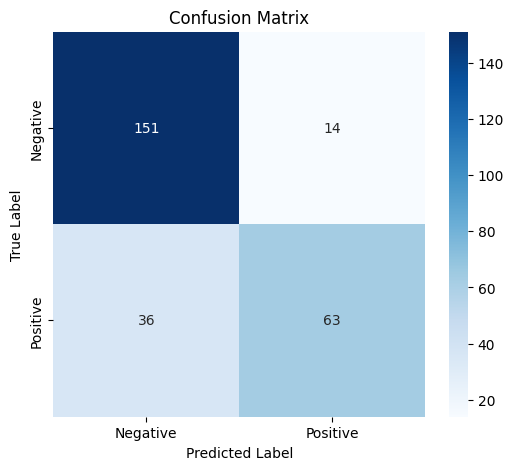

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities and class labels
y_pred_probs = best_model.predict(X_test)  # Get probability outputs
y_pred = (y_pred_probs > 0.5).astype("int32")  # Convert probabilities to binary labels

# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs)

# Print Metrics
print(f"\n🔹 Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
